 ## Bank Telemarketing Campaign Case Study.

#### Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate

#### Importing the libraries.

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the Data set.

In [49]:
df = pd.read_csv('C:/Users/Admin/Downloads/Bank+Dataset/Bank Dataset/bank_marketing_updated_v1.csv')
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [50]:
df.tail()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45212,45211,37,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


#### Read the file without unnecessary headers.

In [51]:
df = pd.read_csv('C:/Users/Admin/Downloads/Bank+Dataset/Bank Dataset/bank_marketing_updated_v1.csv', skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [52]:
df.shape

(45211, 19)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [54]:
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


### Data Cleaning

In [55]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [56]:
# Dropping customerid column
df.drop('customerid', axis=1, inplace=True)

In [57]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories

In [58]:
df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])

In [59]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [60]:
df.drop('jobedu', axis=1, inplace=True)

### Handling missing values

In [61]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### handling missing values in age column.

In [62]:
df = df[~df.age.isnull()].copy()

In [63]:
df.age.isnull().sum()

0

In [64]:
df.shape

(45191, 19)

#### handling missing values in month column

In [65]:
df.month.value_counts()

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [66]:
df.month.mode()

0    may, 2017
dtype: object

In [67]:
df.month.fillna(df.month.mode()[0], inplace=True)

In [68]:
df.month.value_counts()

may, 2017    13790
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [69]:
df.month.isnull().sum()

0

#### handling missing values in response column

Target variable is better of not imputed.

- Drop the records with missing values.

In [70]:
df = df[~df.response.isnull()].copy()

In [71]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column.

In [72]:
df.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.

In [73]:
df.loc[df.pdays<0, 'pdays'] = np.NaN

In [74]:
df.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Handling Outliers

In [75]:
df.describe(percentiles=[0, 0.25, 0.5, 0.75, 0.85, 0.95])

,age,salary,balance,day,campaign,pdays,previous
count,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,8246.000000,45161.000000
mean,40.935763,57004.849317,1362.850690,15.807024,2.763358,224.542202,0.580014
std,10.618790,32087.698810,3045.939589,8.322754,3.096964,115.210792,2.303563
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
0%,18.000000,0.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,133.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,195.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,327.000000,0.000000
85%,53.000000,100000.000000,2540.000000,27.000000,4.000000,351.000000,1.000000
95%,59.000000,100000.000000,5769.000000,29.000000,8.000000,370.000000,3.000000


#### Age variable

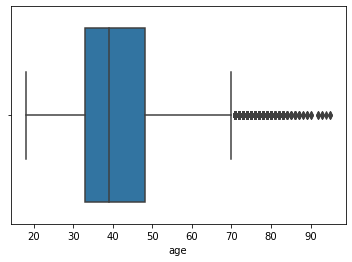

In [76]:
sns.boxplot(df.age)
plt.show()

- There is no outlier in age variable

#### Balance variable

In [78]:
df.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

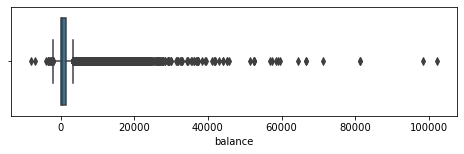

In [79]:
plt.figure(figsize=[8,2])
sns.boxplot(df.balance)
plt.show()

In [80]:
df[df.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


### Standardising values

In [82]:
df.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [83]:
df.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [86]:
df.duration = df.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))

In [87]:
df.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [92]:
df['month'] = df.month.apply(lambda x: x.split(',')[0])

In [93]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.300000,1,NaN,0,unknown,no,unknown,unknown


### Univariate Analysis

#### Categorical unordered univariate analysis

**Marital status**

In [88]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


In [98]:
df.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

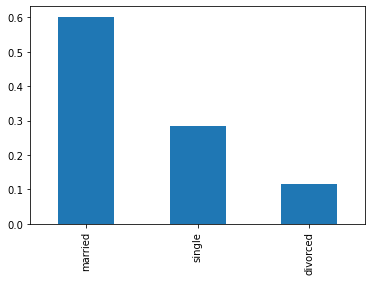

In [94]:
df.marital.value_counts(normalize=True).plot.bar()

- Mejority of people in dataset are married

#### Job

In [95]:
df.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

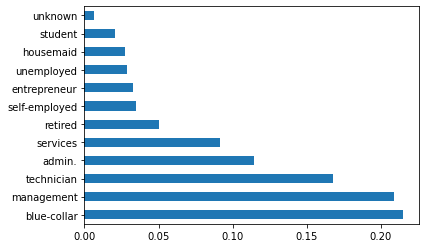

In [97]:
df.job.value_counts(normalize=True).plot.barh()

- Mejority of people have blue-collar and management job profile

#### Categorical ordered univariate analysis

#### Education

In [99]:
df.education.value_counts()

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

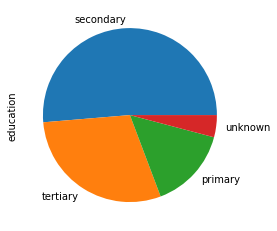

In [100]:
df.education.value_counts().plot.pie()

#### poutcome

In [102]:
df.poutcome.value_counts(normalize=True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

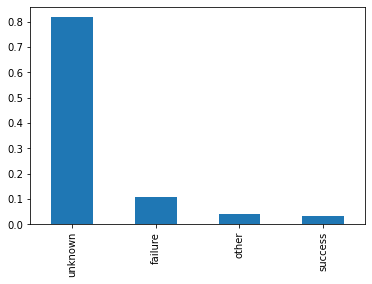

In [103]:
df.poutcome.value_counts(normalize=True).plot.bar()

#### Response the target variable

In [106]:
df.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

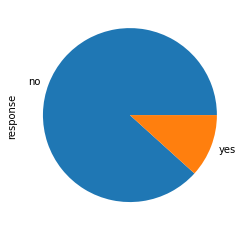

In [107]:
df.response.value_counts(normalize=True).plot.pie()

### Bivariate and Multivariate Analysis

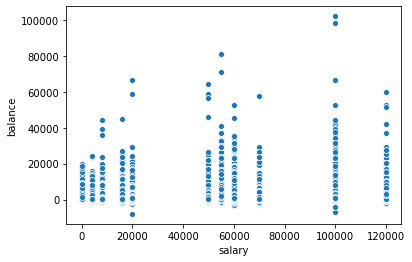

In [108]:
sns.scatterplot(df.salary, df.balance)
plt.show()

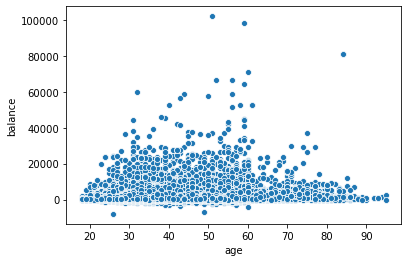

In [110]:
sns.scatterplot(x='age', y='balance', data=df)

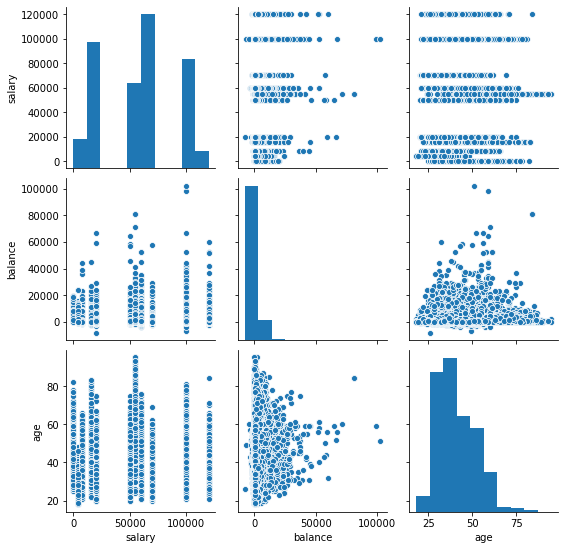

In [111]:
sns.pairplot(data=df, vars=['salary','balance','age'])

#### Correlation heat map

In [112]:
df[['salary','balance','age']].corr()

,salary,balance,age
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


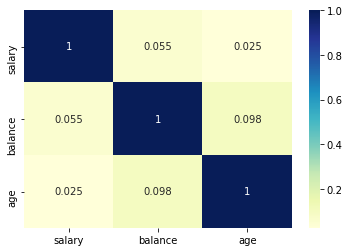

In [113]:
sns.heatmap(df[['salary','balance','age']].corr(), annot=True, cmap='YlGnBu')

### Numerical categorical variable

#### Salary vs response

In [114]:
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [115]:
df.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

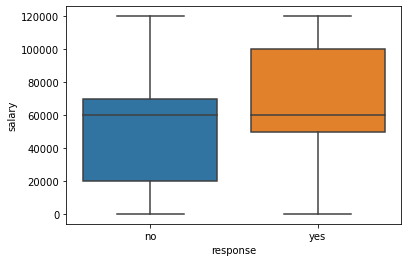

In [116]:
sns.boxplot(data=df, x='response', y='salary')

The interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.

#### Balance vs response

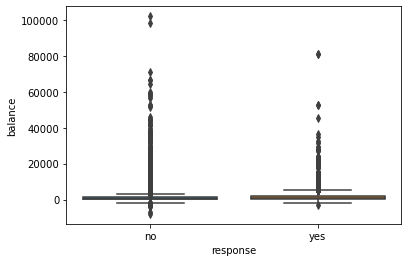

In [117]:
sns.boxplot(data=df, x='response', y='balance')

In [118]:
df.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [119]:
df.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

#### 75th percentile

In [120]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [121]:
df.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


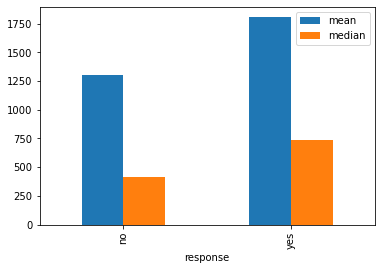

In [123]:
df.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()

#### Education vs salary

In [124]:
df.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

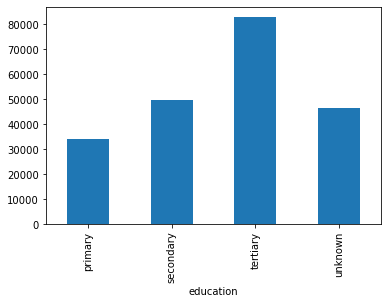

In [125]:
df.groupby('education')['salary'].mean().plot.bar()

- People with tertiary education likely to have high salary range

In [126]:
df.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

#### Job vs salary

In [127]:
df.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

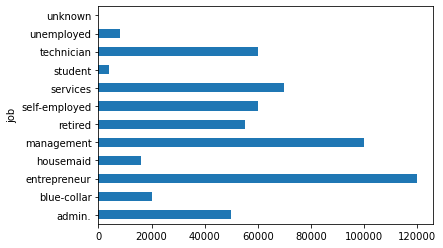

In [128]:
df.groupby('job')['salary'].mean().plot.barh()

- People with entrepreneur or managenemt job profile have high salary

### Categorical - categorical variable

In [137]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,may,3.300000,1,NaN,0,unknown,no,unknown,unknown,0


In [129]:
df['response_flag'] = np.where(df.response=='yes',1,0)

In [130]:
df.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

#### Education vs response rate

In [131]:
df.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate

In [132]:
df.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

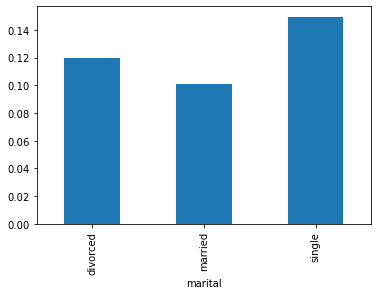

In [133]:
df.groupby('marital')['response_flag'].mean().plot.bar()

- From abve graph we can conclude the campaign should target single customers.

#### Loans vs response rate

In [135]:
df.groupby('loan')['response_flag'].mean()

loan
no     0.126569
yes    0.066953
Name: response_flag, dtype: float64

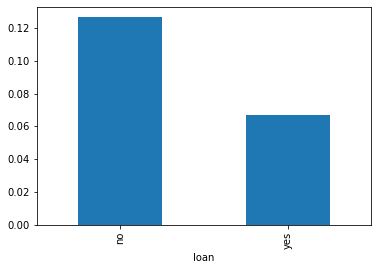

In [136]:
df.groupby('loan')['response_flag'].mean().plot.bar()

#### Housing loans vs response rate

In [138]:
df.groupby('housing')['response_flag'].mean()

housing
no     0.167082
yes    0.077015
Name: response_flag, dtype: float64

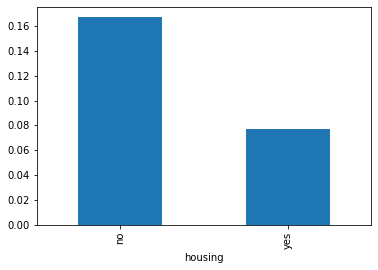

In [139]:
df.groupby('housing')['response_flag'].mean().plot.bar()

- People who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank.

#### Age vs response

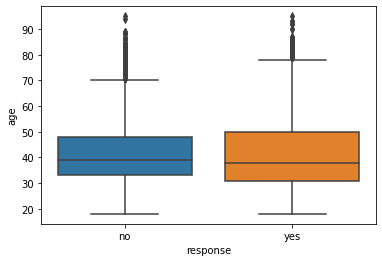

In [140]:
sns.boxplot(data=df, x='response', y='age')
plt.show()

#### making buckets from age columns

In [142]:
pd.cut(df.age[:5], [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): [<30 < 30-40 < 40-50 < 50-60 < 60+]

In [143]:
df['age_group'] = pd.cut(df.age, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

In [145]:
df['age_group'].value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

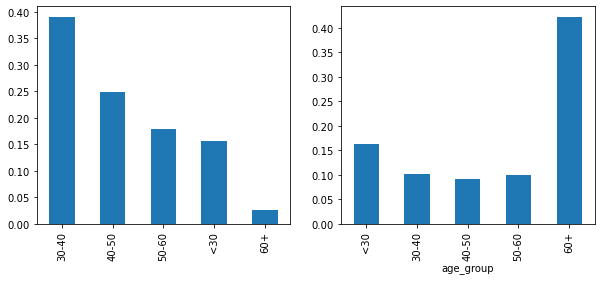

In [147]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df['age_group'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df.groupby('age_group')['response_flag'].mean().plot.bar()
plt.show()

- Age group analysis showed that people in the age group of 60+ or <30 are more likely to respond positively. It may be true for older people, since they want to invest through more secure investment methods such as term deposits to have a secure old age.

### Multivariate analysis

#### Education vs marital vs response

In [157]:
res = pd.pivot_table(data=df, index='education', columns='marital', values='response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


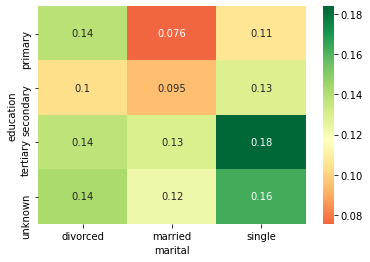

In [158]:
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

- You can see that people who are married and who have completed just their primary education are least likely to give a positive response on term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.

#### Job vs marital vs response

In [155]:
res1 = pd.pivot_table(data=df, index='job', columns='marital', values='response_flag')
res1

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


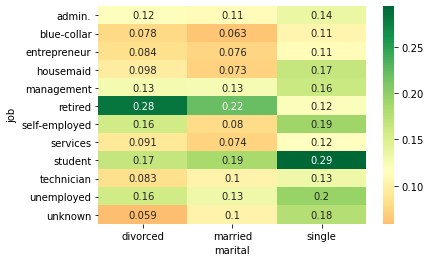

In [159]:
sns.heatmap(res1, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

- you saw that the combinations of married with blue-collar, entrepreneur and housemaid are least likely to go for term deposits. The highest rate of positive response came from students with single marital status. The bank should, therefore, consider these aspects before taking any decision.

#### Education vs poutcome vs response

In [160]:
res2 = pd.pivot_table(data=df, index='education', columns='poutcome', values='response_flag')
res2

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


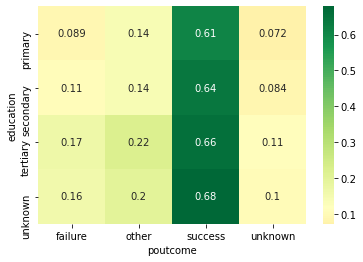

In [161]:
sns.heatmap(res2, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

Average centre is different for this heatmap

In [162]:
df[df.pdays>0].response_flag.mean()

0.2307785593014795

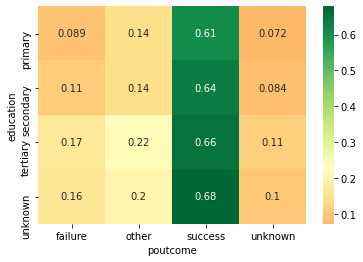

In [164]:
sns.heatmap(res2, annot=True, cmap='RdYlGn', center=0.2308)
plt.show()

- From above we can conclude that the people who have responded positively for previous Campaign are more likely to response positively

### Insights:

- People who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank
- From abve graph we can conclude the campaign should target single customers
- Age group analysis showed that people in the age group of 60+ or <30 are more likely to respond positively. It may be true for older people, since they want to invest through more secure investment methods such as term deposits to have a secure old age.
- You can see that people who are married and who have completed just their primary education are least likely to give a positive response on term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments. Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.
- you saw that the combinations of married with blue-collar, entrepreneur and housemaid are least likely to go for term deposits. The highest rate of positive response came from students with single marital status. The bank should, therefore, consider these aspects before taking any decision.
- From above we can conclude that the people who have responded positively for previous Campaign are more likely to response positively